# Project 1: Diamond Prices

# Content

Here is the content dictionary from [kaggle](https://www.kaggle.com/shivam2503/diamonds): 

**price:** price in US dollars (\$326--\$18,823)

**carat:** weight of the diamond (0.2--5.01)

**cut:** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color:** diamond colour, from J (worst) to D (best)

**clarity:** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x:** length in mm (0--10.74)

**y:** width in mm (0--58.9)

**z:** depth in mm (0--31.8)

**depth:** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table:** width of top of diamond relative to widest point (43--95)

In [150]:
import pandas as pd 
import numpy as np 

In [151]:
diamonds_df = pd.read_csv("datasets\diamonds.csv")

In [152]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [153]:
diamonds_df.isnull().sum()
# we can see that there are no missing values in the dataframe 

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [154]:
diamonds_df.describe()
# we can see that the smallest carat is .2 and the largest is 5.01. Price varies between $326 and $18,823. 

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


The question we want to answer is the following: 
What characteristics of the diamond are most effective in predicting price. 

We want to know how each characteristic that is available to us correlates with price. 

In [155]:
diamonds_df['carat'].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [156]:
bins = [0,1,2,3,4,5,6]
bin_labels = ['0 - 1 carats', '1-2 carats', '2-3 carats', '3-4 carats', '4-5 carats', '5-6 carats']
diamonds_df['carat_bin'] = pd.cut(diamonds_df['carat'], bins, labels = bin_labels)

In [157]:
table = pd.pivot_table(diamonds_df, values = ["price"], index = ['clarity','carat_bin'])
table

price
clarity carat_bin                 
I1      0 - 1 carats   1589.334677
        1-2 carats     4123.139594
        2-3 carats     7893.187500
        3-4 carats    12382.714286
        4-5 carats    16576.500000
        5-6 carats    18018.000000
IF      0 - 1 carats   1482.016763
        1-2 carats    11732.429787
        2-3 carats    18083.250000
SI1     0 - 1 carats   1910.546387
        1-2 carats     6996.510912
        2-3 carats    15604.757642
SI2     0 - 1 carats   2126.231790
        1-2 carats     5866.895876
        2-3 carats    14792.588297
        3-4 carats    17616.083333
VS1     0 - 1 carats   1759.916765
        1-2 carats     9069.968779
        2-3 carats    16254.788889
VS2     0 - 1 carats   1762.329446
        1-2 carats     8431.676788
        2-3 carats    15966.346304
        3-4 carats    18701.000000
VVS1    0 - 1 carats   1489.225222
        1-2 carats    10960.388747
        2-3 carats    16617.400000
VVS2    0 - 1 carats   1629.852567
        1-2 carats    10176.105155
        2-3 carats    16415.500000

In [158]:
table2 = pd.pivot_table(diamonds_df, values = ["price"], index = ['clarity'])
table2

,price
clarity,
I1,3924.168691
IF,2864.839106
SI1,3996.001148
SI2,5063.028606
VS1,3839.455391
VS2,3924.989395
VVS1,2523.114637
VVS2,3283.737071


In [175]:
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

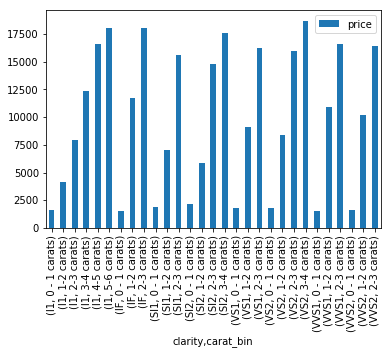

In [176]:
table.plot(y = 'price', kind = 'bar')


It looks like the size of the carat correlates with price for any category of clarity. 

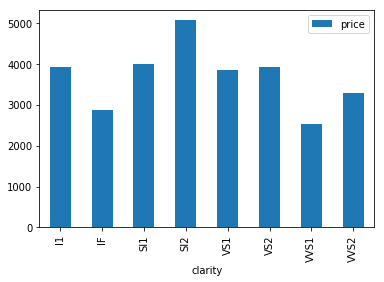

In [161]:
table2.plot(y = 'price', kind = 'bar')

Clarity does not seem to have a clear impact on price. 

In [162]:
table3 = pd.pivot_table(diamonds_df, values = ["price"], index = ['carat_bin'])
table3

,price
carat_bin,
0 - 1 carats,1786.950683
1-2 carats,7607.724076
2-3 carats,14946.222940
3-4 carats,14942.666667
4-5 carats,16576.500000
5-6 carats,18018.000000


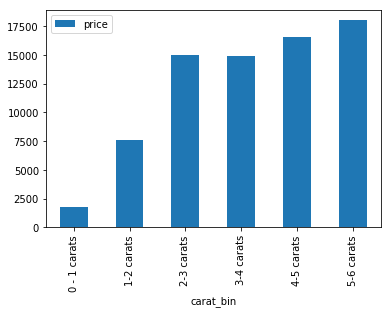

In [163]:
table3.plot(y = 'price', kind = 'bar')

Diamond prices seem to rise sharply above 2 carats. 

In [182]:
table4 = pd.pivot_table(diamonds_df, values = ["price"], index = ['color'])
table4

,price
color,
D,3169.954096
E,3076.752475
F,3724.886397
G,3999.135671
H,4486.669196
I,5091.874954
J,5323.818020


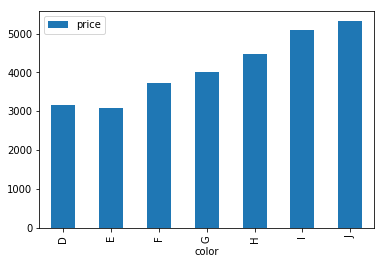

In [183]:
table4.plot(y = 'price', kind = 'bar')


Color seems to have a weak positive correlation with price. 

In [172]:
table4 = pd.pivot_table(diamonds_df, values = ["price"], index = [ 'color', 'clarity'])
table4

price
color clarity             
D     I1       3863.023810
      IF       8307.369863
      SI1      2976.146423
      SI2      3931.101460
      VS1      3030.158865
      VS2      2587.225692
      VVS1     2947.912698
      VVS2     3351.128391
E     I1       3488.421569
      IF       3668.506329
      SI1      3161.838005
      SI2      4173.826036
      VS1      2856.294301
      VS2      2750.941700
      VVS1     2219.820122
      VVS2     2499.674067
F     I1       3342.181818
      IF       2750.836364
      SI1      3714.225716
      SI2      4472.625233
      VS1      3796.717742
      VS2      3756.795093
      VVS1     2804.276567
      VVS2     3475.512821
G     I1       3545.693333
      IF       2558.033774
      SI1      3774.787449
      SI2      5021.684109
      VS1      4131.362197
      VS2      4416.256498
      VVS1     2866.820821
      VVS2     3845.283437
H     I1       4453.413580
      IF       2287.869565
      SI1      5032.414945
      SI2      6099.895074
      VS1      3780.688623
      VS2      4722.414486
      VVS1     1845.658120
      VVS2     2649.067434
I     I1       4302.184783
      IF       1994.937063
      SI1      5355.019663
      SI2      7002.649123
      VS1      4633.183992
      VS2      5690.505560
      VVS1     2034.861972
      VVS2     2968.232877
J     I1       5254.060000
      IF       3363.882353
      SI1      5186.048000
      SI2      6520.958246
      VS1      4884.461255
      VS2      5311.058824
      VVS1     4034.175676
      VVS2     5142.396947

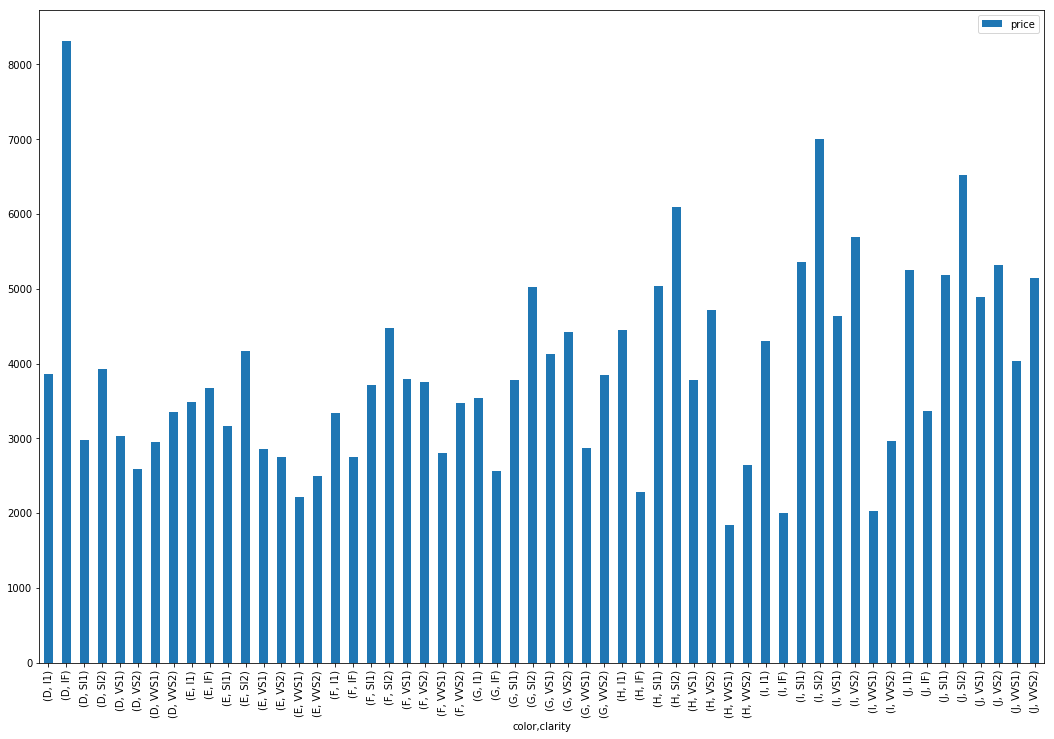

In [173]:
table4.plot( kind = 'bar', figsize = [18,12])


The highest prices seem for be for the SI2 clarity for any color. Overall, the number of carats seems to have the biggest impact on price. 